In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
np.random.seed(5)
%matplotlib inline

Using TensorFlow backend.


In [2]:
batch_size = 512
train_data = np.array(pd.read_csv(r'C:\\Users\Mustafa\Jupyter Notebook work\CNN Learning\dataset\fashion-mnist_train.csv'))
test_data = np.array(pd.read_csv(r'C:\\Users\Mustafa\Jupyter Notebook work\CNN Learning\dataset\fashion-mnist_test.csv'))

In [3]:
test_data.shape

(10000, 785)

In [4]:
train_data[:, 0]

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [5]:
X_train_orig = train_data[:, 1:785]
y_train_orig = train_data[:, 0]
X_test = train_data[:, 1:785]
y_test = train_data[:, 0]

In [6]:
X_train_orig = X_train_orig.astype('float32')
X_test = X_test.astype('float32')
X_train_orig /= 255
X_test /= 255

In [7]:
print(X_train_orig.shape)
print(y_train_orig.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(60000, 784)
(60000,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=12345)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


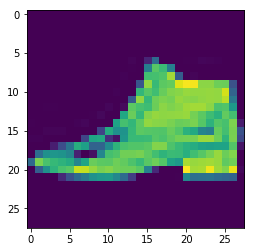

In [10]:
plt.imshow(X_train[2, :].reshape((28, 28)))

In [11]:
model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation='softmax')
])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.6272 - acc: 0.7828 - val_loss: 0.4493 - val_acc: 0.8470
Epoch 2/20
48000/48000 [==============================] - 0s 10us/step - loss: 0.4106 - acc: 0.8547 - val_loss: 0.4164 - val_acc: 0.8484
Epoch 3/20
48000/48000 [==============================] - 0s 10us/step - loss: 0.3671 - acc: 0.8708 - val_loss: 0.3805 - val_acc: 0.8640
Epoch 4/20
48000/48000 [==============================] - 0s 10us/step - loss: 0.3370 - acc: 0.8794 - val_loss: 0.3270 - val_acc: 0.8863
Epoch 5/20
48000/48000 [==============================] - 0s 10us/step - loss: 0.3176 - acc: 0.8855 - val_loss: 0.3225 - val_acc: 0.8814
Epoch 6/20
48000/48000 [==============================] - 0s 10us/step - loss: 0.2969 - acc: 0.8933 - val_loss: 0.3305 - val_acc: 0.8828
Epoch 7/20
48000/48000 [==============================] - 1s 10us/step - loss: 0.2811 - acc: 0.8974 - val_loss: 0.3174 - val_acc

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.180793094941
Test accuracy: 0.934983333333


In [16]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [17]:
cnn1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [18]:
cnn1.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [19]:
cnn1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 57us/step - loss: 0.6416 - acc: 0.7801 - val_loss: 0.4278 - val_acc: 0.8454
Epoch 2/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.3875 - acc: 0.8643 - val_loss: 0.3572 - val_acc: 0.8738
Epoch 3/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.3405 - acc: 0.8809 - val_loss: 0.3264 - val_acc: 0.8872
Epoch 4/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.3111 - acc: 0.8907 - val_loss: 0.2997 - val_acc: 0.8945
Epoch 5/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.2910 - acc: 0.8975 - val_loss: 0.3004 - val_acc: 0.8928
Epoch 6/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.2798 - acc: 0.8999 - val_loss: 0.2747 - val_acc: 0.9043
Epoch 7/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.2632 - acc: 0.9055 - val_loss: 0.2694 - val_acc

In [20]:
cnn1.optimizer.lr = 0.0001

In [21]:
cnn1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.2244 - acc: 0.9188 - val_loss: 0.2528 - val_acc: 0.9103
Epoch 2/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.2090 - acc: 0.9256 - val_loss: 0.2457 - val_acc: 0.9133
Epoch 3/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.2011 - acc: 0.9283 - val_loss: 0.2459 - val_acc: 0.9119
Epoch 4/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.1947 - acc: 0.9301 - val_loss: 0.2392 - val_acc: 0.9145
Epoch 5/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.1871 - acc: 0.9338 - val_loss: 0.2461 - val_acc: 0.9101
Epoch 6/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.1808 - acc: 0.9352 - val_loss: 0.2307 - val_acc: 0.9183
Epoch 7/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.1728 - acc: 0.9383 - val_loss: 0.2318 - val_acc

In [22]:
score = cnn1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000/60000 [==============================] - 3s 43us/step
Test loss: 0.147866875121
Test accuracy: 0.949166666667


In [23]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_val, y_val, batch_size=batch_size)

In [24]:
cnn1.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=False)

Epoch 1/50
93/93 [==============================] - 10s 107ms/step - loss: 0.4744 - acc: 0.8257 - val_loss: 0.4110 - val_acc: 0.8471
Epoch 2/50
93/93 [==============================] - 9s 97ms/step - loss: 0.4087 - acc: 0.8487 - val_loss: 0.3926 - val_acc: 0.8558
Epoch 3/50
93/93 [==============================] - 9s 97ms/step - loss: 0.3913 - acc: 0.8554 - val_loss: 0.3695 - val_acc: 0.8653
Epoch 4/50
93/93 [==============================] - 9s 97ms/step - loss: 0.3762 - acc: 0.8606 - val_loss: 0.3602 - val_acc: 0.8694
Epoch 5/50
93/93 [==============================] - 9s 97ms/step - loss: 0.3690 - acc: 0.8635 - val_loss: 0.3548 - val_acc: 0.8659
Epoch 6/50
93/93 [==============================] - 9s 97ms/step - loss: 0.3559 - acc: 0.8683 - val_loss: 0.3412 - val_acc: 0.8711
Epoch 7/50
93/93 [==============================] - 9s 97ms/step - loss: 0.3465 - acc: 0.8708 - val_loss: 0.3425 - val_acc: 0.8713
Epoch 8/50
93/93 [==============================] - 9s 97ms/step - loss: 0.3478 -

In [25]:
score = cnn1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000/60000 [==============================] - 3s 47us/step
Test loss: 0.17375172334
Test accuracy: 0.93645


# CNN with 3 Convolutional Layers

In [26]:
cnn2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [27]:
cnn2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [28]:
cnn2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 53us/step - loss: 0.9953 - acc: 0.6309 - val_loss: 0.5837 - val_acc: 0.7801
Epoch 2/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.5745 - acc: 0.7818 - val_loss: 0.4700 - val_acc: 0.8262
Epoch 3/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.4888 - acc: 0.8166 - val_loss: 0.4151 - val_acc: 0.8507
Epoch 4/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.4382 - acc: 0.8374 - val_loss: 0.3763 - val_acc: 0.8647
Epoch 5/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.4047 - acc: 0.8513 - val_loss: 0.3503 - val_acc: 0.8738
Epoch 6/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.3811 - acc: 0.8595 - val_loss: 0.3239 - val_acc: 0.8827
Epoch 7/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.3562 - acc: 0.8709 - val_loss: 0.3096 - val_acc

In [29]:
cnn2.optimizer.lr = 0.0001

In [30]:
cnn2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 40us/step - loss: 0.3045 - acc: 0.8900 - val_loss: 0.2710 - val_acc: 0.9006
Epoch 2/10
48000/48000 [==============================] - 2s 40us/step - loss: 0.2954 - acc: 0.8920 - val_loss: 0.2659 - val_acc: 0.9037
Epoch 3/10
48000/48000 [==============================] - 2s 40us/step - loss: 0.2869 - acc: 0.8954 - val_loss: 0.2569 - val_acc: 0.9037
Epoch 4/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.2817 - acc: 0.8968 - val_loss: 0.2597 - val_acc: 0.9022
Epoch 5/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.2731 - acc: 0.9010 - val_loss: 0.2521 - val_acc: 0.9070
Epoch 6/10
48000/48000 [==============================] - 2s 43us/step - loss: 0.2682 - acc: 0.9017 - val_loss: 0.2427 - val_acc: 0.9089
Epoch 7/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.2612 - acc: 0.9046 - val_loss: 0.2427 - val_acc

In [31]:
score = cnn2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000/60000 [==============================] - 3s 55us/step
Test loss: 0.194906186376
Test accuracy: 0.929433333333


In [32]:
cnn2.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=False)

Epoch 1/50
93/93 [==============================] - 10s 110ms/step - loss: 0.4419 - acc: 0.8332 - val_loss: 0.3664 - val_acc: 0.8639
Epoch 2/50
93/93 [==============================] - 9s 100ms/step - loss: 0.4092 - acc: 0.8454 - val_loss: 0.3488 - val_acc: 0.8682
Epoch 3/50
93/93 [==============================] - 9s 100ms/step - loss: 0.3877 - acc: 0.8566 - val_loss: 0.3434 - val_acc: 0.8740
Epoch 4/50
93/93 [==============================] - 9s 100ms/step - loss: 0.3787 - acc: 0.8579 - val_loss: 0.3272 - val_acc: 0.8812
Epoch 5/50
93/93 [==============================] - 9s 100ms/step - loss: 0.3684 - acc: 0.8620 - val_loss: 0.3148 - val_acc: 0.8816
Epoch 6/50
93/93 [==============================] - 9s 101ms/step - loss: 0.3575 - acc: 0.8661 - val_loss: 0.3125 - val_acc: 0.8810
Epoch 7/50
93/93 [==============================] - 9s 101ms/step - loss: 0.3512 - acc: 0.8685 - val_loss: 0.3132 - val_acc: 0.8830
Epoch 8/50
93/93 [==============================] - 9s 100ms/step - loss: 0

In [33]:
score = cnn2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000/60000 [==============================] - 3s 57us/step
Test loss: 0.178289840607
Test accuracy: 0.9329


# CNN with 4 Convolutional Layers and Batch Normalization

In [34]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
def norm_input(x): return (x-mean_px)/std_px

In [35]:
cnn3 = Sequential([
    Lambda(norm_input, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),    
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [36]:
cnn3.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [37]:
cnn3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 207us/step - loss: 0.7301 - acc: 0.7499 - val_loss: 0.4323 - val_acc: 0.8475
Epoch 2/10
48000/48000 [==============================] - 8s 162us/step - loss: 0.4324 - acc: 0.8433 - val_loss: 0.3779 - val_acc: 0.8635
Epoch 3/10
48000/48000 [==============================] - 8s 161us/step - loss: 0.3613 - acc: 0.8710 - val_loss: 0.3002 - val_acc: 0.8930
Epoch 4/10
48000/48000 [==============================] - 8s 164us/step - loss: 0.3175 - acc: 0.8860 - val_loss: 0.2724 - val_acc: 0.9030
Epoch 5/10
48000/48000 [==============================] - 8s 162us/step - loss: 0.2859 - acc: 0.8985 - val_loss: 0.2631 - val_acc: 0.9040
Epoch 6/10
48000/48000 [==============================] - 8s 161us/step - loss: 0.2609 - acc: 0.9071 - val_loss: 0.2533 - val_acc: 0.9073
Epoch 7/10
48000/48000 [==============================] - 8s 161us/step - loss: 0.2454 - acc: 0.9125 - val_loss: 0.2602 -

In [38]:
cnn3.optimizer.lr = 0.0001

In [39]:
cnn3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 161us/step - loss: 0.1911 - acc: 0.9320 - val_loss: 0.2040 - val_acc: 0.9266
Epoch 2/10
48000/48000 [==============================] - 8s 161us/step - loss: 0.1811 - acc: 0.9359 - val_loss: 0.2089 - val_acc: 0.9266
Epoch 3/10
48000/48000 [==============================] - 8s 162us/step - loss: 0.1727 - acc: 0.9372 - val_loss: 0.2067 - val_acc: 0.9283
Epoch 4/10
48000/48000 [==============================] - 8s 162us/step - loss: 0.1607 - acc: 0.9409 - val_loss: 0.2021 - val_acc: 0.9304
Epoch 5/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.1554 - acc: 0.9442 - val_loss: 0.2232 - val_acc: 0.9219
Epoch 6/10
48000/48000 [==============================] - 8s 161us/step - loss: 0.1486 - acc: 0.9461 - val_loss: 0.2044 - val_acc: 0.9315
Epoch 7/10
48000/48000 [==============================] - 8s 163us/step - loss: 0.1390 - acc: 0.9497 - val_loss: 0.2082 - 

In [40]:
score = cnn3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000/60000 [==============================] - 6s 98us/step
Test loss: 0.101205606656
Test accuracy: 0.964583333333


### Data Augmentation

In [41]:
cnn3.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=False)

Epoch 1/50
93/93 [==============================] - 10s 112ms/step - loss: 0.4079 - acc: 0.8583 - val_loss: 0.3191 - val_acc: 0.8868
Epoch 2/50
93/93 [==============================] - 9s 100ms/step - loss: 0.3377 - acc: 0.8776 - val_loss: 0.2969 - val_acc: 0.8908
Epoch 3/50
93/93 [==============================] - 10s 103ms/step - loss: 0.3030 - acc: 0.8909 - val_loss: 0.2915 - val_acc: 0.8930
Epoch 4/50
93/93 [==============================] - 10s 110ms/step - loss: 0.2968 - acc: 0.8916 - val_loss: 0.2750 - val_acc: 0.9002
Epoch 5/50
93/93 [==============================] - 11s 118ms/step - loss: 0.2869 - acc: 0.8972 - val_loss: 0.2848 - val_acc: 0.8955
Epoch 6/50
93/93 [==============================] - 9s 101ms/step - loss: 0.2782 - acc: 0.8987 - val_loss: 0.2478 - val_acc: 0.9098
Epoch 7/50
93/93 [==============================] - 10s 102ms/step - loss: 0.2682 - acc: 0.9035 - val_loss: 0.2593 - val_acc: 0.9067
Epoch 8/50
93/93 [==============================] - 10s 105ms/step - lo

In [42]:
score = cnn3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000/60000 [==============================] - 6s 94us/step
Test loss: 0.101326133166
Test accuracy: 0.96415


In [43]:
model.save('fashion_mnist.h5')

In [20]:
from keras.models import load_model
import cv2
import numpy as np
from keras import optimizers

model = load_model('fashion_mnist.h5')

#cnn3.compile(loss='sparse_categorical_crossentropy',
 #             optimizer=Adam(lr=0.001),
  #            metrics=['accuracy'])

img = cv2.imread(r'C:\\Users\Mustafa\Jupyter Notebook work\CNN Learning\test_images\tro.jpg',0)
img = cv2.resize(img,(1,784))
img = np.reshape(img,[1,784])

classes = model.predict_classes(img)

print (classes)

[8]
